# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 589


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url =  "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | magistral'nyy
Processing Record 2 of Set 1 | adamstown
Processing Record 3 of Set 1 | dunedin
Processing Record 4 of Set 1 | mcpherson
Processing Record 5 of Set 1 | sassandra
Processing Record 6 of Set 1 | san borja
Processing Record 7 of Set 1 | puerto natales
Processing Record 8 of Set 1 | antofagasta
Processing Record 9 of Set 1 | stanley
Processing Record 10 of Set 1 | tshabong
Processing Record 11 of Set 1 | vilyuchinsk
Processing Record 12 of Set 1 | kalevala
Processing Record 13 of Set 1 | nova sintra
Processing Record 14 of Set 1 | port-aux-francais
Processing Record 15 of Set 1 | port mathurin
Processing Record 16 of Set 1 | dock junction
Processing Record 17 of Set 1 | grytviken
Processing Record 18 of Set 1 | caleta de carquin
Processing Record 19 of Set 1 | albany
Processing Record 20 of Set 1 | olonkinbyen
Processing Record 21 of Set 1 | remire-montjoly
Processing Record 22 of Set 1

In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          571
Lat           571
Lng           571
Max Temp      571
Humidity      571
Cloudiness    571
Wind Speed    571
Country       571
Date          571
dtype: int64

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,magistral'nyy,56.1725,107.4458,-33.13,94,70,0.56,RU,1702264827
1,adamstown,-25.0660,-130.1015,21.31,56,0,2.58,PN,1702264828
2,dunedin,-45.8742,170.5036,16.40,59,35,3.52,NZ,1702264828
3,mcpherson,38.3708,-97.6642,3.38,71,11,6.30,US,1702264717
4,sassandra,4.9500,-6.0833,25.63,86,2,1.73,CI,1702264828


In [11]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [13]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,magistral'nyy,56.1725,107.4458,-33.13,94,70,0.56,RU,1702264827
1,adamstown,-25.0660,-130.1015,21.31,56,0,2.58,PN,1702264828
2,dunedin,-45.8742,170.5036,16.40,59,35,3.52,NZ,1702264828
3,mcpherson,38.3708,-97.6642,3.38,71,11,6.30,US,1702264717
4,sassandra,4.9500,-6.0833,25.63,86,2,1.73,CI,1702264828


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

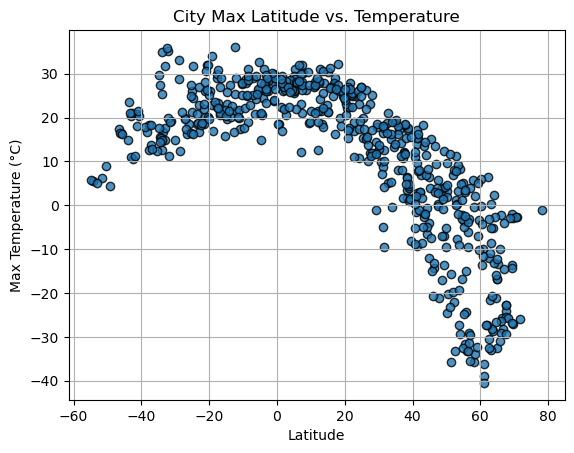

In [14]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="black", marker="o", alpha=0.8)

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

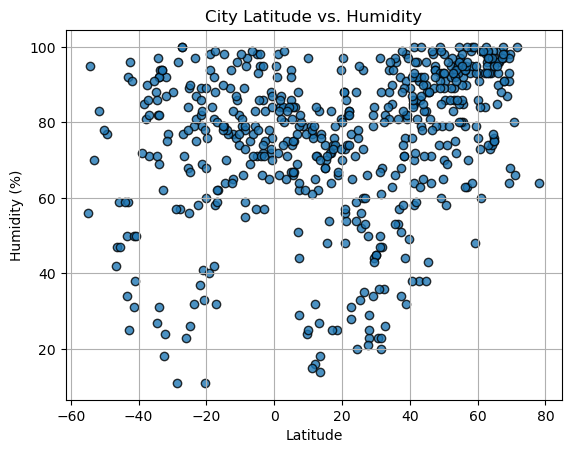

In [15]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black", marker="o", alpha=0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

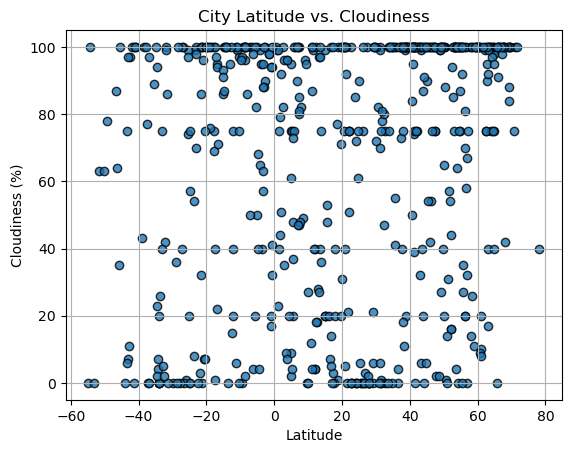

In [16]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black", marker="o", alpha=0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

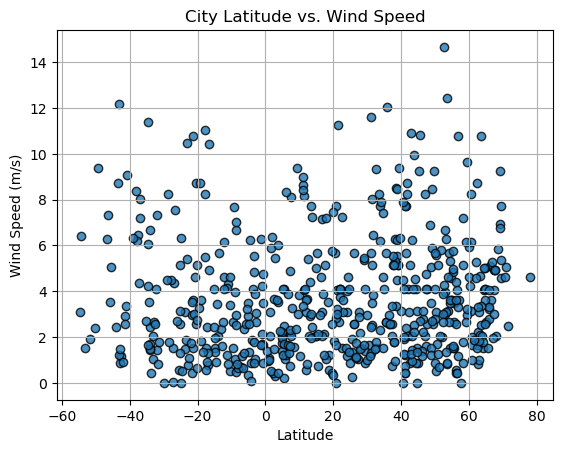

In [17]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="black", marker="o", alpha=0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [21]:
def plot_linear_regression(x_values, y_values, title, xlabel, ylabel, label_position, fig_name):
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    
    # Calculate regression values
    regress_values = x_values * slope + intercept
    
    # Create line equation string
    line_eq = f"y = {slope:.2f}x + {intercept:.2f}"
    
    # Create scatter plot
    plt.scatter(x_values, y_values, edgecolors="black", marker="o", alpha=0.8, label="Cities")
    
    # Plot regression line
    plt.plot(x_values, regress_values, "r-", label=line_eq)
    
    # Annotate the linear regression equation on the plot
    plt.annotate(line_eq, label_position, fontsize=15, color="red")
    
    # Add labels and title
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    # Display r-value
    print(f"The r-value is: {rvalue}")
    
    # Show the plot
    plt.legend()
    plt.show()

In [22]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,magistral'nyy,56.1725,107.4458,-33.13,94,70,0.56,RU,1702264827
3,mcpherson,38.3708,-97.6642,3.38,71,11,6.30,US,1702264717
4,sassandra,4.9500,-6.0833,25.63,86,2,1.73,CI,1702264828
8,stanley,54.8680,-1.6985,5.16,96,75,3.60,GB,1702264829
10,vilyuchinsk,52.9306,158.4028,1.15,89,100,3.98,RU,1702264830


In [23]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,adamstown,-25.0660,-130.1015,21.31,56,0,2.58,PN,1702264828
2,dunedin,-45.8742,170.5036,16.40,59,35,3.52,NZ,1702264828
5,san borja,-14.8167,-66.8500,23.18,98,100,1.53,BO,1702264829
6,puerto natales,-51.7236,-72.4875,6.23,83,63,1.91,CL,1702264829
7,antofagasta,-23.6500,-70.4000,18.60,79,8,1.46,CL,1702264563


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8373487510132605


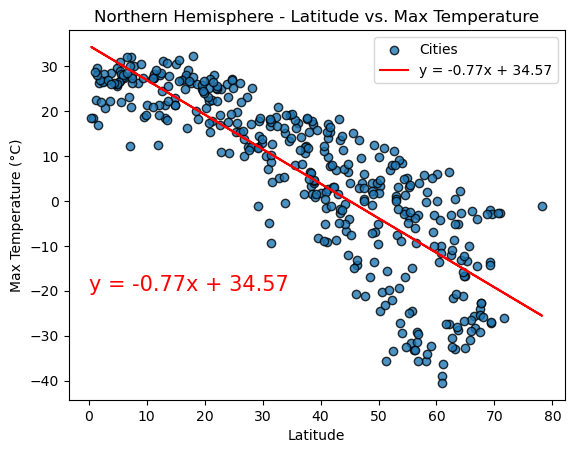

In [26]:
# Linear regression on Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"],
                       "Northern Hemisphere - Latitude vs. Max Temperature",
                       "Latitude", "Max Temperature (°C)", (0, -20), "Temperature_vs_Latitude_Northern_Hemisphere")

The r-value is: 0.5920333757961793


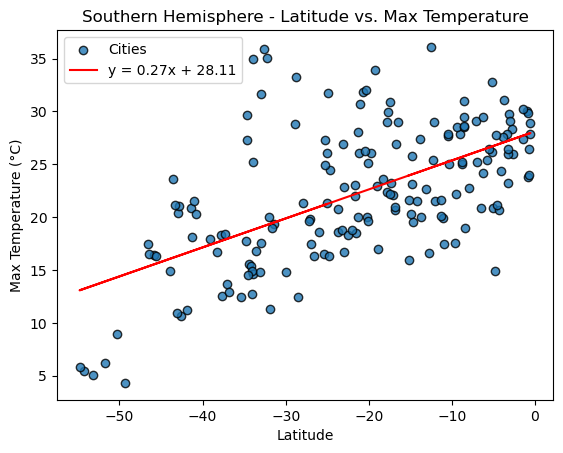

In [28]:
# Linear regression on Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"],
                       "Southern Hemisphere - Latitude vs. Max Temperature",
                       "Latitude", "Max Temperature (°C)", (-30, 50), "Temperature_vs_Latitude_Southern_Hemisphere")

**Discussion about the linear relationship:**
Northern Hemisphere:
The linear regression plot for the Northern Hemisphere shows a negative correlation between latitude and maximum temperature. As latitude increases (moving away from the equator towards the North Pole), there is a decrease in maximum temperature.
The negative slope of the regression line indicates that, on average, cities at higher latitudes in the Northern Hemisphere experience lower maximum temperatures.

Southern Hemisphere:
The linear regression plot for the Southern Hemisphere exhibits a positive correlation between latitude and maximum temperature. As latitude increases (moving away from the equator towards the South Pole), there is an increase in maximum temperature.
The positive slope of the regression line suggests that, on average, cities at higher latitudes in the Southern Hemisphere tend to have higher maximum temperatures.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.3941273076256795


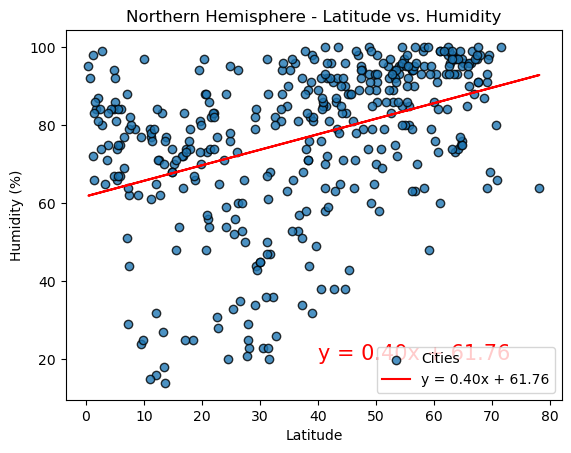

In [29]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"],
                       "Northern Hemisphere - Latitude vs. Humidity",
                       "Latitude", "Humidity (%)", (40, 20), "Humidity_vs_Latitude_Northern_Hemisphere")

The r-value is: 0.21604643560512607


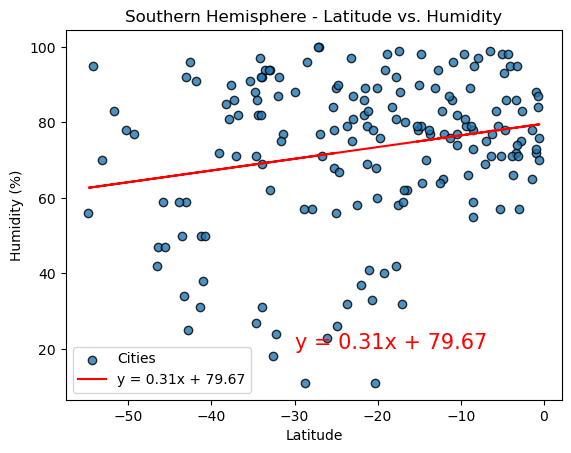

In [30]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"],
                       "Southern Hemisphere - Latitude vs. Humidity",
                       "Latitude", "Humidity (%)", (-30, 20), "Humidity_vs_Latitude_Southern_Hemisphere")

**Discussion about the linear relationship:** 
Northern Hemisphere:
The linear regression plot for the Northern Hemisphere shows a relatively weak correlation between latitude and humidity. The regression line may exhibit a slight positive or negative slope, but the relationship is not as pronounced as in the case of temperature.
Humidity in the Northern Hemisphere is influenced by various factors such as geographical features, proximity to water bodies, and local weather patterns, making it less predictable solely based on latitude.

Southern Hemisphere:
Similarly, the linear regression plot for the Southern Hemisphere also indicates a relatively weak correlation between latitude and humidity. The slope of the regression line may be positive or negative, suggesting that there isn't a strong systematic relationship between latitude and humidity.


### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.25834237205067945


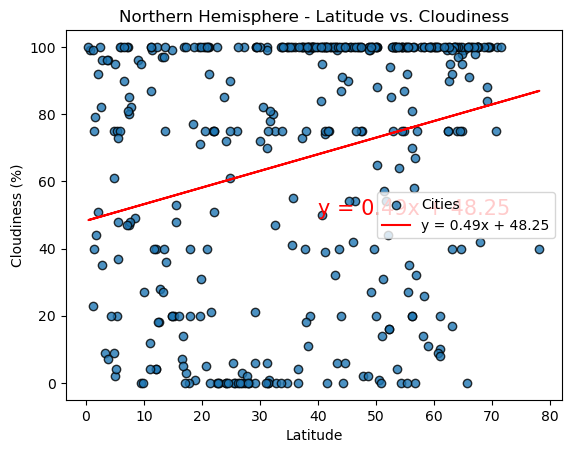

In [31]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"],
                       "Northern Hemisphere - Latitude vs. Cloudiness",
                       "Latitude", "Cloudiness (%)", (40, 50), "Cloudiness_vs_Latitude_Northern_Hemisphere")

The r-value is: 0.2249972913382982


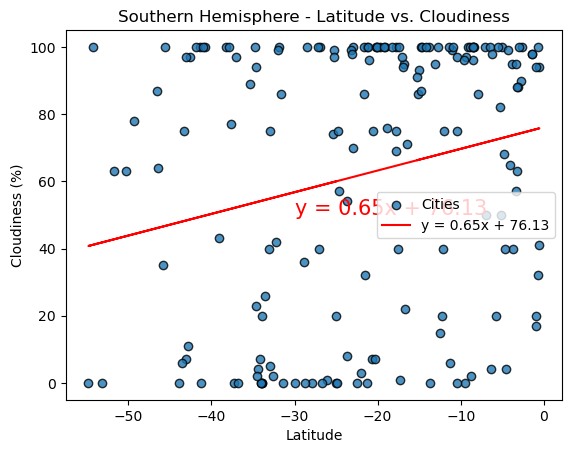

In [32]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"],
                       "Southern Hemisphere - Latitude vs. Cloudiness",
                       "Latitude", "Cloudiness (%)", (-30, 50), "Cloudiness_vs_Latitude_Southern_Hemisphere")

**Discussion about the linear relationship:**
Northern Hemisphere:
The linear regression plot for the Northern Hemisphere suggests a weak and scattered correlation between latitude and cloudiness. The regression line may have a slight positive or negative slope, but the cloudiness does not show a clear trend with latitude.
Cloudiness is influenced by various factors, including local weather patterns, topography, and proximity to large water bodies. Latitude alone may not be a strong predictor of cloudiness in the Northern Hemisphere.

Southern Hemisphere:
Similarly, the linear regression plot for the Southern Hemisphere also indicates a weak and scattered correlation between latitude and cloudiness. The slope of the regression line may vary, suggesting that latitude alone does not strongly determine cloudiness in the Southern Hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.1179048405365471


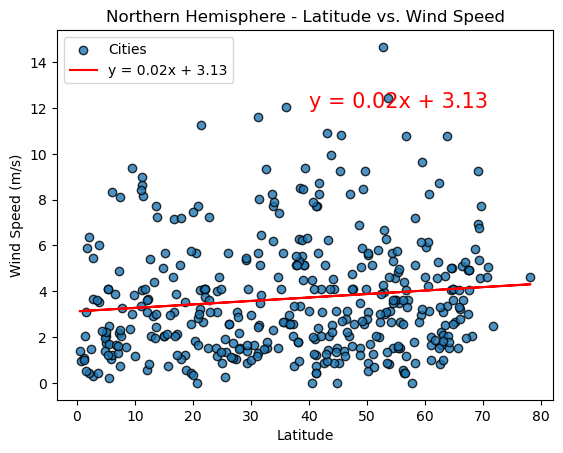

In [33]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"],
                       "Northern Hemisphere - Latitude vs. Wind Speed",
                       "Latitude", "Wind Speed (m/s)", (40, 12), "WindSpeed_vs_Latitude_Northern_Hemisphere")

The r-value is: -0.20562554425299115


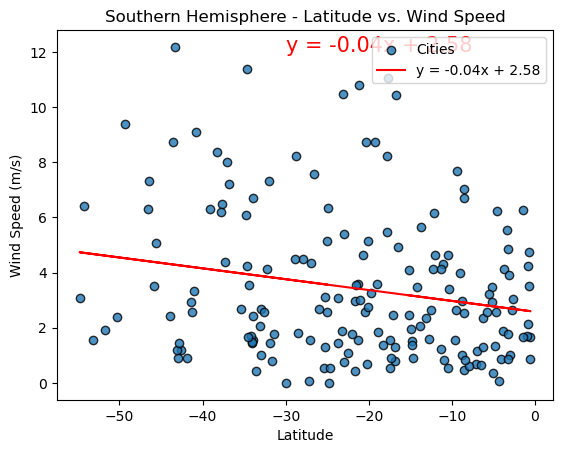

In [34]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"],
                       "Southern Hemisphere - Latitude vs. Wind Speed",
                       "Latitude", "Wind Speed (m/s)", (-30, 12), "WindSpeed_vs_Latitude_Southern_Hemisphere")

**Discussion about the linear relationship:**
Northern Hemisphere:
The linear regression plot for the Northern Hemisphere shows a relatively weak and scattered correlation between latitude and wind speed. The regression line may exhibit a slight positive or negative slope, but the relationship is not well-defined.
Wind speed is influenced by various factors, including local topography, temperature gradients, and proximity to large bodies of water. Latitude alone may not be a strong predictor of wind speed in the Northern Hemisphere.

Southern Hemisphere:
Similarly, the linear regression plot for the Southern Hemisphere also indicates a relatively weak and scattered correlation between latitude and wind speed. The slope of the regression line may vary, suggesting that latitude alone does not strongly determine wind speed in the Southern Hemisphere.